In [1]:
# =======================

#  BIGRAM NAME GENERATOR

# =======================

In [2]:
# Load the data

names = open('names.txt').read().splitlines()

In [3]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
min(len(n) for n in names)

2

In [5]:
max(len(n) for n in names)

15

In [6]:
# -----------------------

#  1. Pure Python bigram

# -----------------------

In [7]:
D = {} # create a dictionary

for n in names:

    new_n = ['<S>'] + list(n) + ['<E>']

    for ch1, ch2 in zip(new_n, new_n[1:]): 
        
        # zip is weird, but you can picture it as a folder holding two files:
        # ch1 → new_n, ch2 → new_n[1:]
        
        bigram = (ch1, ch2) # build a tuple
        
        # Very simple: count occurrences for our bigram statistics.
        # We look at two consecutive characters and predict the second one from the first.
        
        D[bigram] = D.get(bigram, 0)+ 1 # If the tuple (ch1, ch2) is already in D, 
        #D.get returns its current count (e.g., 1, 2, 3). “+1” bumps it by one.

In [8]:
# .items() turns the dict into (key, value) pairs
sorted(D.items(), key= lambda kv: -kv[1]) # minus sign → descending order
# Example: (('n','<E>'), 6763), (('a','<E>'), 6640)
# ‘n’ is more likely to end a name than ‘a’. Statistics!

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
# -----------------------

#  2. Torch intro

# -----------------------

In [10]:
import torch
torch.set_printoptions(sci_mode=False)

In [11]:
a = torch.zeros((3,5), dtype=torch.int32)# a simple tensor (multi-dim array)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [12]:
# Quick sanity check: our eventual 2-D array will be 26×26
# plus two side tokens '<S>' and '<E>'.

# Unique characters in the corpus

int_ch = sorted(list(set(''.join(names)))) # Nice and quick: set() kills duplicates, so we keep only the
# alphabet letters—26 of them, indexed 0-25.

# ''.join(names) would concatenate all names into one giant string.

In [13]:
# Assign an index to every character

atoz = {i:s for s,i in enumerate(int_ch)}
atoz['<S>'] = 26
atoz['<E>'] = 27

# atoz lets us map characters to integers for the 28×28 array
atoz

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [14]:
# -----------------------

#  3. Count bigrams into a 28×28 tensor

# -----------------------

In [15]:
# N is my 28x28 2D array

N = torch.zeros((28,28), dtype=torch.int32)

for n in names:

    new_n = ['<S>'] + list(n) + ['<E>']

    for ch1,ch2 in zip(new_n, new_n[1:]):

        x1 = atoz[ch1] # map chars to indices

        x2 = atoz[ch2]

        print(x1,x2)

        N[x1, x2] += 1 # e.g. N[26,4] = 0+1 every time (‘<S>’,‘e’) appears

N # looks messy let’s pretty print it

26 4
4 12
12 12
12 0
0 27
26 14
14 11
11 8
8 21
21 8
8 0
0 27
26 0
0 21
21 0
0 27
26 8
8 18
18 0
0 1
1 4
4 11
11 11
11 0
0 27
26 18
18 14
14 15
15 7
7 8
8 0
0 27
26 2
2 7
7 0
0 17
17 11
11 14
14 19
19 19
19 4
4 27
26 12
12 8
8 0
0 27
26 0
0 12
12 4
4 11
11 8
8 0
0 27
26 7
7 0
0 17
17 15
15 4
4 17
17 27
26 4
4 21
21 4
4 11
11 24
24 13
13 27
26 0
0 1
1 8
8 6
6 0
0 8
8 11
11 27
26 4
4 12
12 8
8 11
11 24
24 27
26 4
4 11
11 8
8 25
25 0
0 1
1 4
4 19
19 7
7 27
26 12
12 8
8 11
11 0
0 27
26 4
4 11
11 11
11 0
0 27
26 0
0 21
21 4
4 17
17 24
24 27
26 18
18 14
14 5
5 8
8 0
0 27
26 2
2 0
0 12
12 8
8 11
11 0
0 27
26 0
0 17
17 8
8 0
0 27
26 18
18 2
2 0
0 17
17 11
11 4
4 19
19 19
19 27
26 21
21 8
8 2
2 19
19 14
14 17
17 8
8 0
0 27
26 12
12 0
0 3
3 8
8 18
18 14
14 13
13 27
26 11
11 20
20 13
13 0
0 27
26 6
6 17
17 0
0 2
2 4
4 27
26 2
2 7
7 11
11 14
14 4
4 27
26 15
15 4
4 13
13 4
4 11
11 14
14 15
15 4
4 27
26 11
11 0
0 24
24 11
11 0
0 27
26 17
17 8
8 11
11 4
4 24
24 27
26 25
25 14
14 4
4 24
24 27
26 13
13

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [16]:
ztoa = {i:s for s,i in atoz.items()} # Reverse lookup: idx → char

for i in range(28):

    for j in range(28):

        print(ztoa[i] + ztoa[j])  # Fetch the characters for each matrix cell

aa
ab
ac
ad
ae
af
ag
ah
ai
aj
ak
al
am
an
ao
ap
aq
ar
as
at
au
av
aw
ax
ay
az
a<S>
a<E>
ba
bb
bc
bd
be
bf
bg
bh
bi
bj
bk
bl
bm
bn
bo
bp
bq
br
bs
bt
bu
bv
bw
bx
by
bz
b<S>
b<E>
ca
cb
cc
cd
ce
cf
cg
ch
ci
cj
ck
cl
cm
cn
co
cp
cq
cr
cs
ct
cu
cv
cw
cx
cy
cz
c<S>
c<E>
da
db
dc
dd
de
df
dg
dh
di
dj
dk
dl
dm
dn
do
dp
dq
dr
ds
dt
du
dv
dw
dx
dy
dz
d<S>
d<E>
ea
eb
ec
ed
ee
ef
eg
eh
ei
ej
ek
el
em
en
eo
ep
eq
er
es
et
eu
ev
ew
ex
ey
ez
e<S>
e<E>
fa
fb
fc
fd
fe
ff
fg
fh
fi
fj
fk
fl
fm
fn
fo
fp
fq
fr
fs
ft
fu
fv
fw
fx
fy
fz
f<S>
f<E>
ga
gb
gc
gd
ge
gf
gg
gh
gi
gj
gk
gl
gm
gn
go
gp
gq
gr
gs
gt
gu
gv
gw
gx
gy
gz
g<S>
g<E>
ha
hb
hc
hd
he
hf
hg
hh
hi
hj
hk
hl
hm
hn
ho
hp
hq
hr
hs
ht
hu
hv
hw
hx
hy
hz
h<S>
h<E>
ia
ib
ic
id
ie
if
ig
ih
ii
ij
ik
il
im
in
io
ip
iq
ir
is
it
iu
iv
iw
ix
iy
iz
i<S>
i<E>
ja
jb
jc
jd
je
jf
jg
jh
ji
jj
jk
jl
jm
jn
jo
jp
jq
jr
js
jt
ju
jv
jw
jx
jy
jz
j<S>
j<E>
ka
kb
kc
kd
ke
kf
kg
kh
ki
kj
kk
kl
km
kn
ko
kp
kq
kr
ks
kt
ku
kv
kw
kx
ky
kz
k<S>
k<E>
la
lb
lc
ld
le
lf
lg
lh
li
lj
lk

In [17]:
# -----------------------

#  4. Heat-map visualisation

# -----------------------

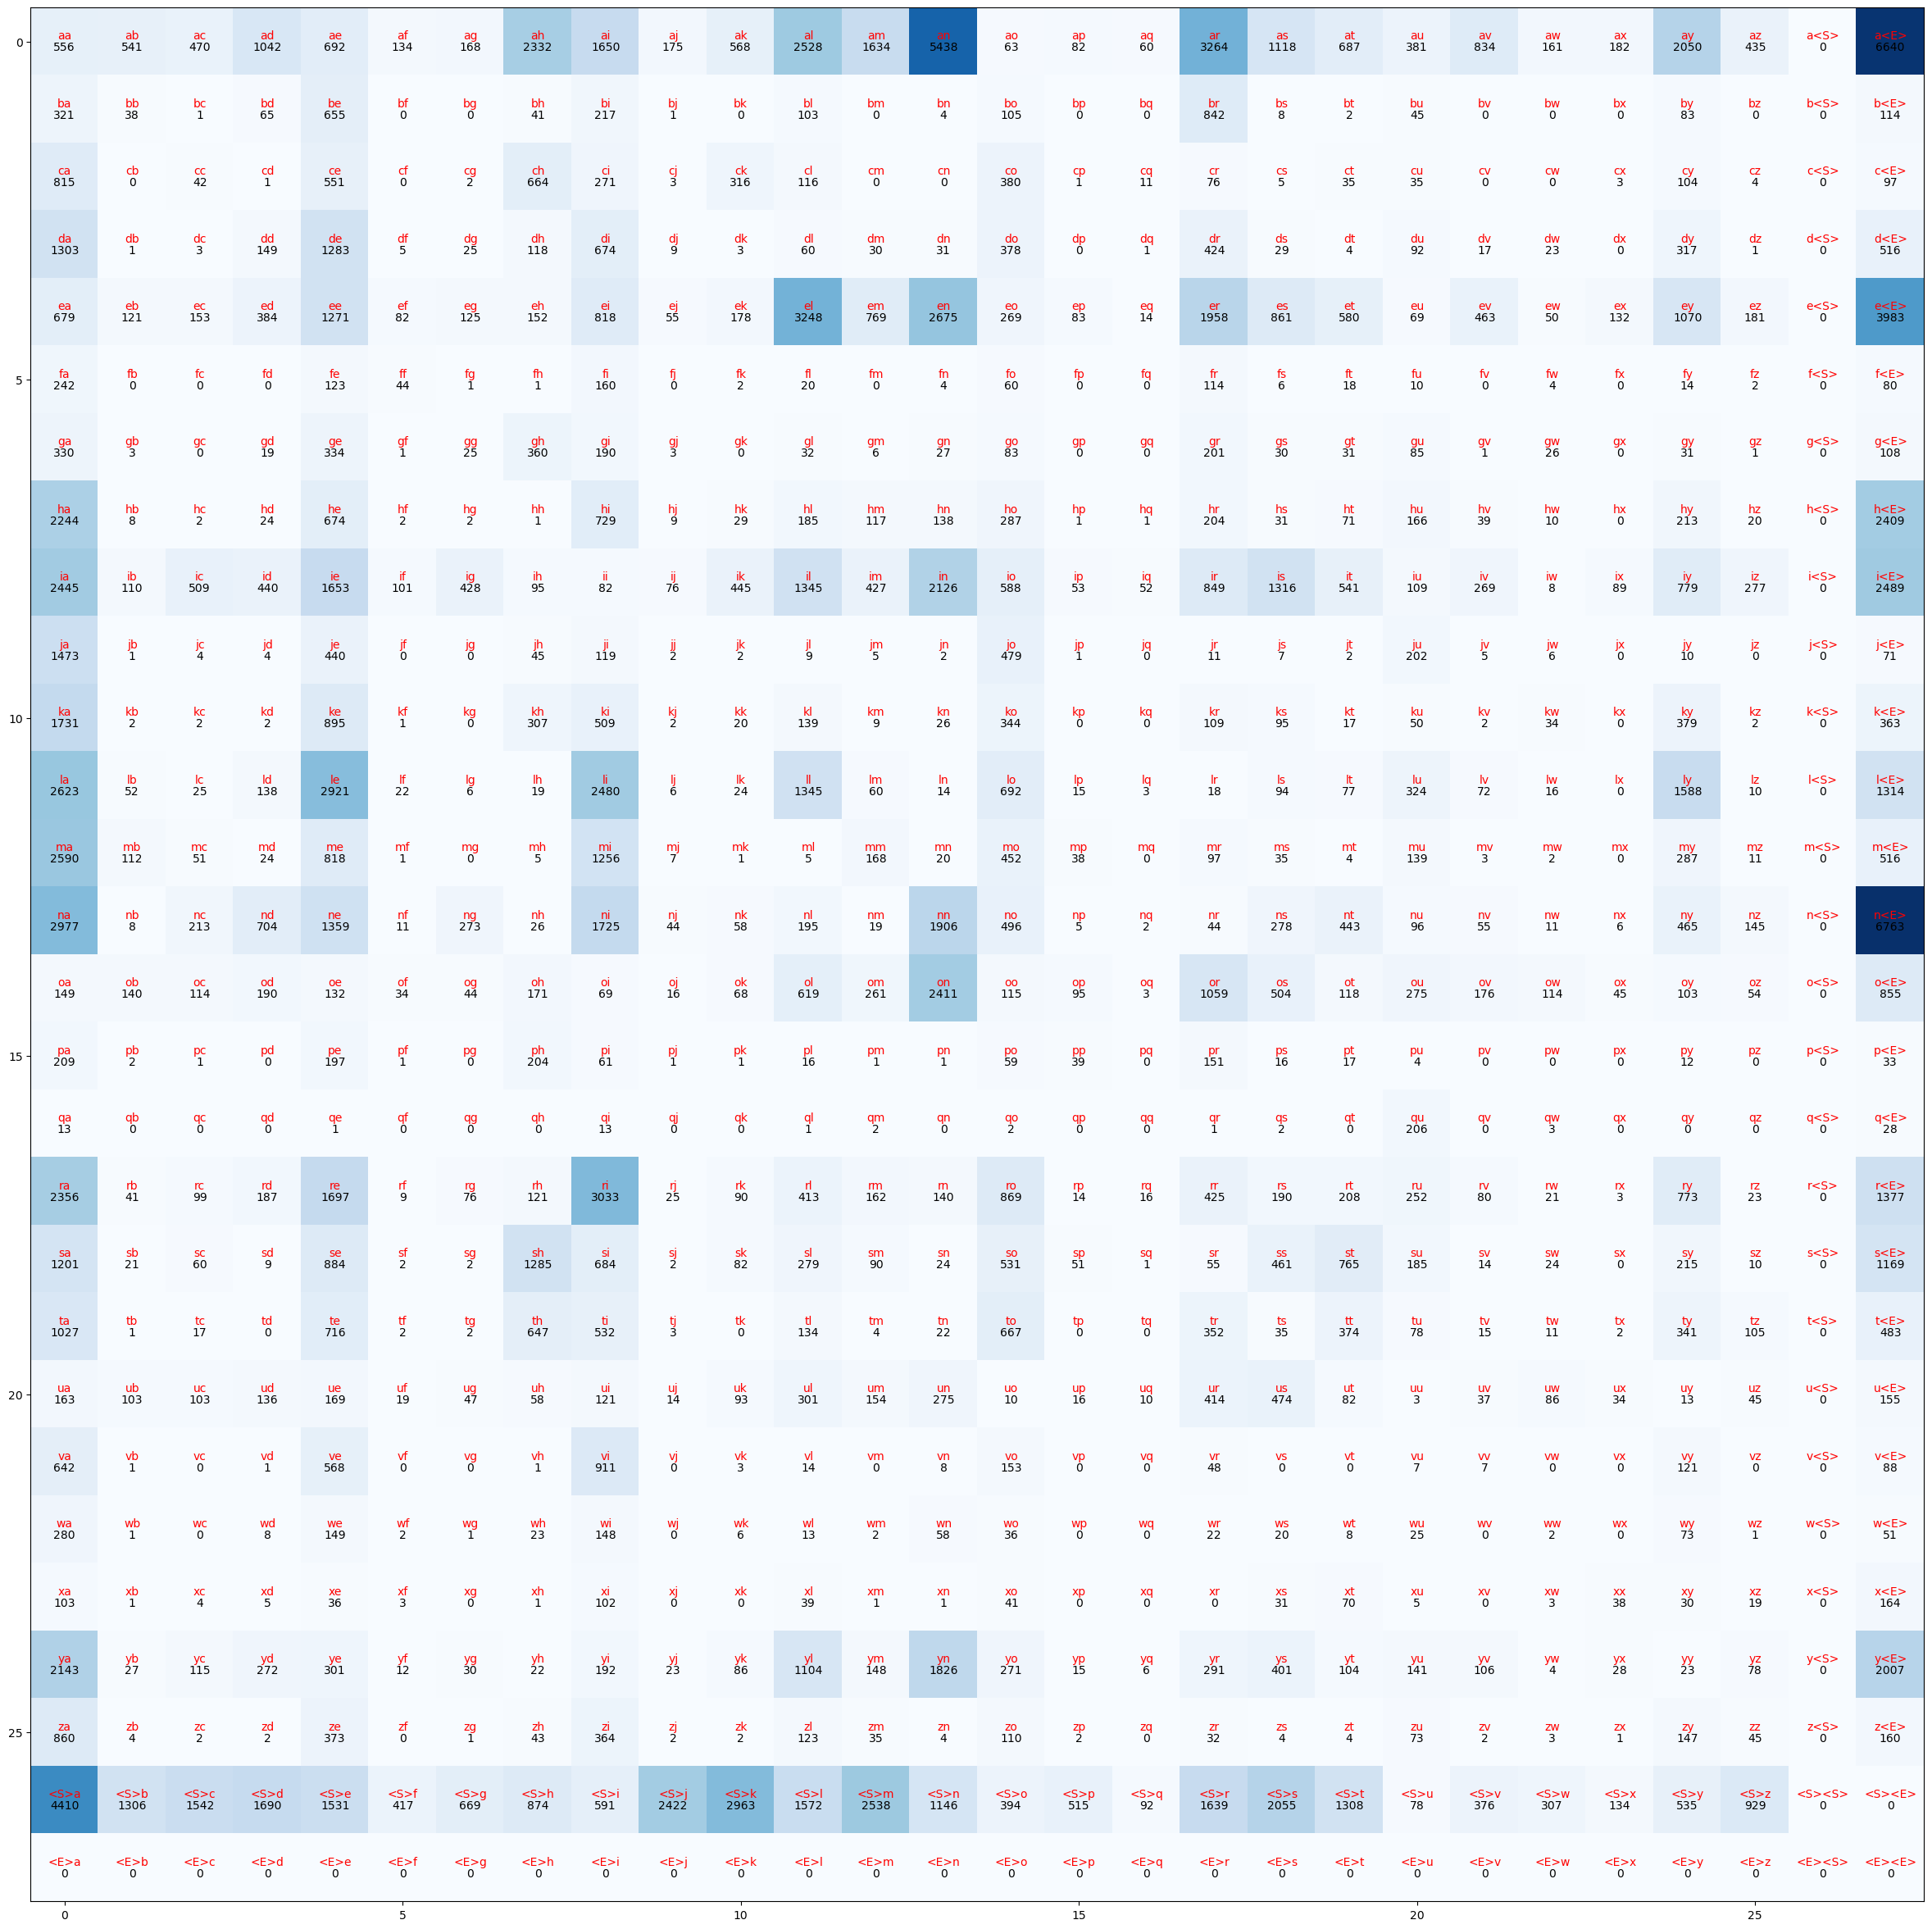

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,30))
plt.imshow(N, cmap='Blues')

for i in range(28):

    for j in range(28):

        chars = ztoa[i] + ztoa[j]

        plt.text(j, i, chars, ha= 'center', va= 'bottom', color='red') # Note: swap (j,i) to avoid a visual transpose.
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color= 'black') # N[i,j] is a tensor to get the value from a tensor we include .item()

plt.show()
plt.close()

# Voilà!
# Brackets denote special tokens.
# Observations:
#   • Pairs like <E><E>, <S><S>, <S><E>, <E><S> shouldn’t exist—no word there.
#   • <E>→<S> isn’t logical, so our first approach is a bit off.

In [19]:
# -----------------------

#  5. Cleaner scheme: use “.” as boundary

# -----------------------

In [20]:
N_new = torch.zeros((27,27), dtype= torch.int32)

atoz_new = {i:s + 1 for s,i in enumerate(int_ch)} # shift A-Z to 1-26
atoz_new['.'] = 0 # 0 marks the boundary

ztoa_new = {i:s for s,i in atoz_new.items()}

for n in names:

    char = ['.'] + list(n) + ['.']

    for ch1, ch2 in zip(char, char[1:]):

        xt1 = atoz_new[ch1]
        xt2 = atoz_new[ch2]

        N_new[xt1, xt2] += 1

# Quick peek
N_new

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

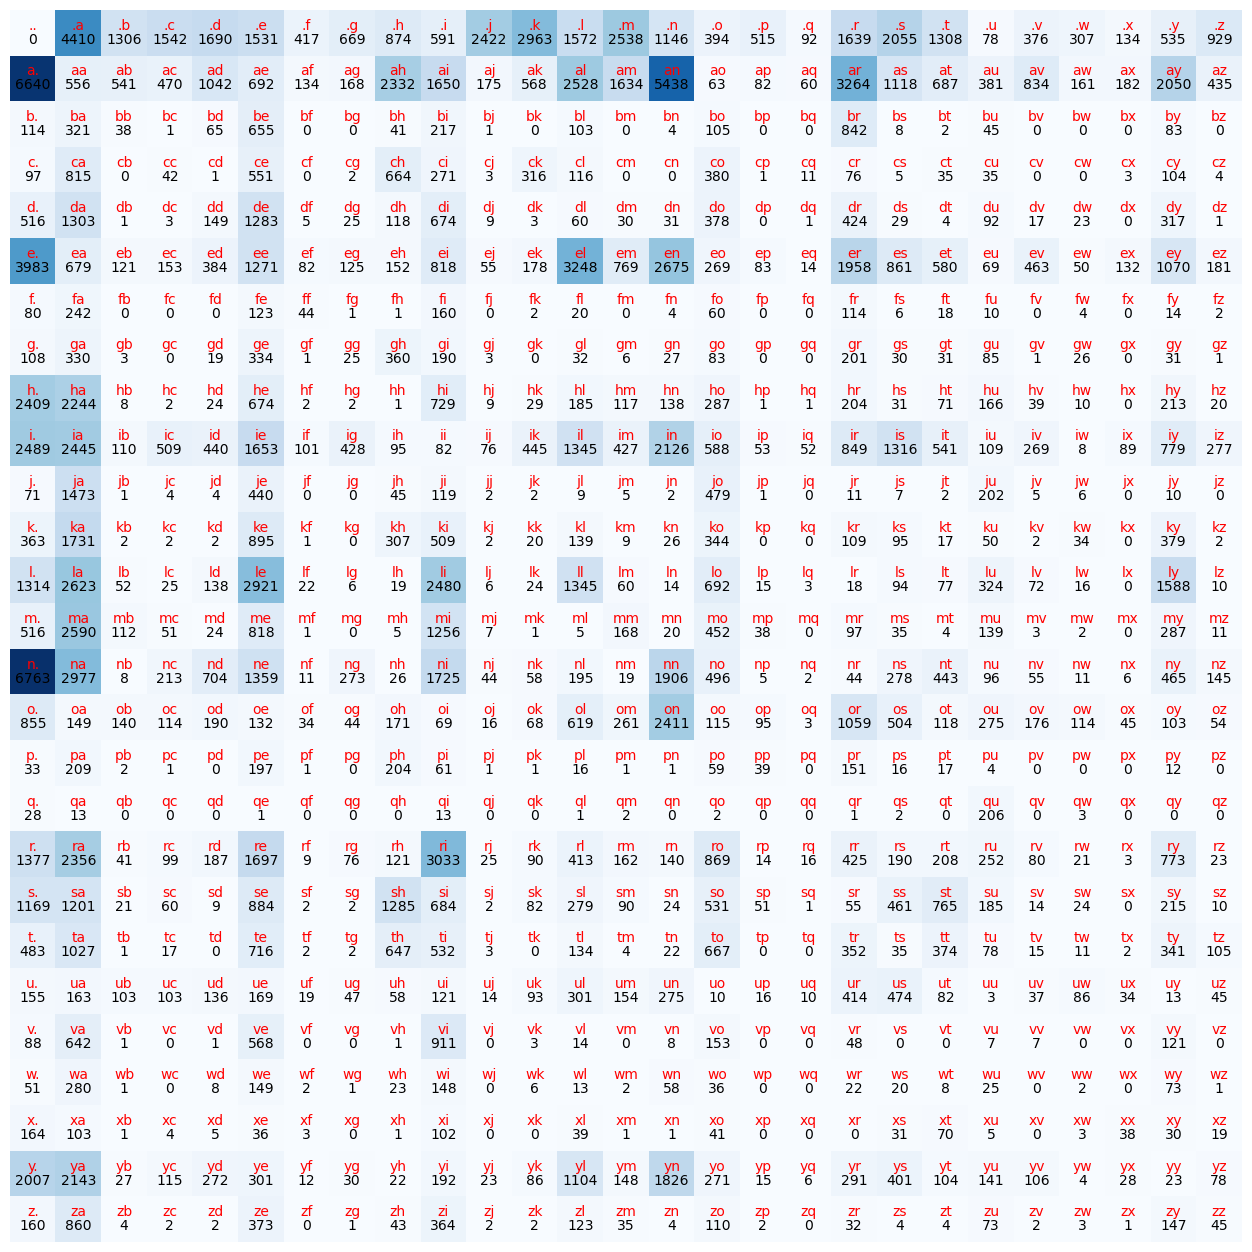

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N_new, cmap='Blues')

for i in range(27):

    for j in range(27):

        chstr = ztoa_new[i] + ztoa_new[j]

        plt.text(j, i, chstr, ha='center', va ='bottom', color='red')
        plt.text(j,i, N_new[i,j].item(), ha='center', va= 'top', color= 'black')

plt.axis('off'); # full screen view
plt.show()
plt.close()

In [22]:
# -----------------------

#  6. Sampling a first letter

# -----------------------

In [23]:
N_new[0] # counts for “.x”

p = N_new[0].float() # Transform the data type to float

In [24]:
p /= p.sum() # calculating the probability distribution

print(p)

p.sum()  # sanity check → 1.0

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


tensor(1.)

In [25]:
# -----------------------

#  7. Quick sampling demo

# -----------------------

In [26]:
g = torch.Generator().manual_seed(2147483647)  # deterministic

p_test = torch.rand(3, generator=g) #  3 random values following normal distribution

p_test

tensor([0.7081, 0.3542, 0.1054])

In [27]:
# calculating now the probability of this test

p_test /= p_test.sum()

p_test 
#lets test

tensor([0.6064, 0.3033, 0.0903])

In [28]:
# multinomial the function generate samples given the probability distribution

torch.multinomial(p_test, num_samples=100, replacement=True, generator=g) # Sample 100 start letters from p_test
 # 32-1, 64-0 and 4-2 

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [29]:
# now lets apply it to our probability distribution

idx = torch.multinomial(p, num_samples=100, replacement=True, generator=g)

print(idx) # each number represent a word 

print(ztoa_new[26]) # 26 maps to ‘z’

tensor([19,  4,  4,  5, 19,  3,  1,  2, 10,  1, 13,  4, 19, 19,  1, 10, 13,  5,
        22, 10,  1, 19, 19,  8,  6,  3, 13, 13, 13, 10, 19,  5, 16, 19, 12,  5,
         1, 13, 16, 19, 13, 11,  1,  9, 12, 11, 19, 13, 10,  7,  3,  4, 11, 14,
         4,  4, 19, 12,  1, 10, 22, 11, 14, 14, 26, 12, 19, 13, 26, 11, 11, 19,
        13, 12,  4, 23, 26,  2,  5, 12,  3,  1, 12, 25,  5, 10, 13,  2, 20,  1,
        19,  2, 26, 11, 16, 11,  1,  1,  1, 13])
z


In [30]:
# -----------------------

#  8. Generate some names (bigram model)

# -----------------------

In [31]:
g_copy = torch.Generator().manual_seed(2147483647) 

ix = 0

for i in range(10):

    out= []

    while True:

        Prob = N_new[ix].float()
        Prob /= Prob.sum()

        ix = torch.multinomial(Prob, num_samples= 1, replacement= True, generator=g_copy).item()

        out.append(ztoa_new[ix])

        if ix == 0 : # boundary reached
            break

    print(''.join(out))  # e.g. “cexze” – nonsense, but that’s a vanilla bigram!

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [32]:
# -----------------------

#  9. Pre-compute full probability matrix P

# -----------------------

In [33]:
P = (N_new + 1).float()          # add one smoothing
P /= P.sum(1, keepdim=True)      # row wise normalisation
P[0].sum()                       # still 1

tensor(1.)

In [34]:
# -----------------------

# 10. Evaluate with average negative log-likelihood (NLL)

# -----------------------

In [35]:
Loglikelihood = 0.0
n_x = 0

for n in names:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = atoz_new[ch1]
        ix2 = atoz_new[ch2]
        prob = P[ix1, ix2]
        Loglikelihood += torch.log(prob)
        n_x += 1

loss = -Loglikelihood / n_x
print(f'NLL = {loss:.4f}')  # ≈ 2.45 – lower is better


NLL = 2.4544


In [36]:
# -----------------------
# 11. Toy example: “aminejq”
# -----------------------
for n in ['aminejq']:
    Loglikelihood = n_x = 0
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        ix1 = atoz_new[ch1]
        ix2 = atoz_new[ch2]
        prob = P[ix1, ix2]
        Loglikelihood += torch.log(prob)
        n_x += 1
        print(f'{ch1}{ch2}: {prob:.4f}')
    print('Avg NLL:', (-Loglikelihood / n_x).item())

.a: 0.1376
am: 0.0482
mi: 0.1885
in: 0.1200
ne: 0.0741
ej: 0.0027
jq: 0.0003
q.: 0.0970
Avg NLL: 3.4528048038482666


In [37]:
# Bigram summary:
#   • Build counts, turn them into probabilities.
#   • Evaluate with average NLL (Classification).
#   • The closer to 0, the better.

In [38]:
# -----------------------

# 12. Neural-net alternative

# -----------------------

In [39]:
xs, ys = [], []  # input char, target char

for n in names[:1]:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        xs.append(atoz_new[ch1])
        ys.append(atoz_new[ch2])
        print(f'{ch1=}, {ch2=}')

xs = torch.tensor(xs)
ys = torch.tensor(ys)

ch1='.', ch2='e'
ch1='e', ch2='m'
ch1='m', ch2='m'
ch1='m', ch2='a'
ch1='a', ch2='.'


In [40]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()  # one-hot → float

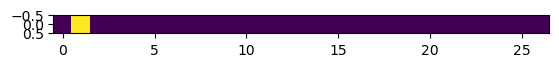

In [ ]:
plt.imshow(xenc)  # yellow dots at positions 0,1,5,13,13
plt.show()
plt.close()

In [42]:
# One linear layer, random init
weight = torch.randn((27, 27))
logits = xenc @ weight
counts = logits.exp()
probab = counts / counts.sum(1, keepdim=True)  # softmax “by hand”
probab

tensor([[0.0229, 0.0949, 0.0454, 0.0631, 0.0853, 0.0125, 0.0191, 0.0289, 0.1156,
         0.0191, 0.0411, 0.0392, 0.0069, 0.0413, 0.0446, 0.0527, 0.0257, 0.0027,
         0.0521, 0.0109, 0.0099, 0.0518, 0.0056, 0.0525, 0.0097, 0.0104, 0.0362],
        [0.0093, 0.0108, 0.1088, 0.0159, 0.0149, 0.0154, 0.0439, 0.1109, 0.0149,
         0.0321, 0.0154, 0.1330, 0.1000, 0.0851, 0.0043, 0.0091, 0.0267, 0.0094,
         0.0879, 0.0064, 0.0102, 0.0090, 0.0302, 0.0153, 0.0132, 0.0512, 0.0169],
        [0.0045, 0.0136, 0.0148, 0.0262, 0.0685, 0.0021, 0.0142, 0.0288, 0.0347,
         0.1456, 0.0408, 0.0860, 0.0929, 0.0060, 0.0421, 0.0064, 0.0220, 0.0033,
         0.0784, 0.0030, 0.0654, 0.0330, 0.0503, 0.0040, 0.0874, 0.0102, 0.0155],
        [0.0045, 0.0136, 0.0148, 0.0262, 0.0685, 0.0021, 0.0142, 0.0288, 0.0347,
         0.1456, 0.0408, 0.0860, 0.0929, 0.0060, 0.0421, 0.0064, 0.0220, 0.0033,
         0.0784, 0.0030, 0.0654, 0.0330, 0.0503, 0.0040, 0.0874, 0.0102, 0.0155],
        [0.0641, 0.0959,

In [43]:
probab[0].sum() # 1.0

tensor(1.)

In [44]:
# -----------------------

# 13. Full data set

# -----------------------

In [45]:
xs, ys = [], []
for n in names:
    chrs = ['.'] + list(n) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        xs.append(atoz_new[ch1])
        ys.append(atoz_new[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [46]:
o = 5
nlls = torch.zeros(o)
for i in range(o):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {ztoa_new[x]}{ztoa_new[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probab[i])
  print('label (actual next character):', y)
  p = probab[i, y]
  print('probability assigned by the net to the the correct character:', p.item()) 
  logp = torch.log(p)
  neglogp = - logp
  print('log likelihood:', logp.item())
  print('negative log likelihood:', neglogp.item())
  nlls[i] = neglogp

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item()) # Our single value evaluation


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0229, 0.0949, 0.0454, 0.0631, 0.0853, 0.0125, 0.0191, 0.0289, 0.1156,
        0.0191, 0.0411, 0.0392, 0.0069, 0.0413, 0.0446, 0.0527, 0.0257, 0.0027,
        0.0521, 0.0109, 0.0099, 0.0518, 0.0056, 0.0525, 0.0097, 0.0104, 0.0362])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012486281804740429
log likelihood: -4.383124828338623
negative log likelihood: 4.383124828338623
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0093, 0.0108, 0.1088, 0.0159, 0.0149, 0.0154, 0.0439, 0.1109, 0.0149,
        0.0321, 0.0154, 0.1330, 0.1000, 0.0851, 0.0043, 0.0091, 0.0267, 0.0094,
        0.0879, 0.0064, 0.0102, 0.0090, 0.0302, 0.0153, 0.0132, 0.0512, 0.0169])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

In [47]:
g = torch.Generator().manual_seed(2_147_483_647)
w = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()

# Training loop (forward + backward)
for i in range(100):
    logits = xenc @ w
    counts = logits.exp()
    probab = counts / counts.sum(1, keepdim=True)
    loss = -probab[torch.arange(len(xs)), ys].log().mean()
    print(loss.item())
    w.grad = None
    loss.backward()
    w.data += -50 * w.grad  # step with a big LR for demo

3.758953332901001
3.371100664138794
3.1540427207946777
3.020374059677124
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496353149414
2.6890032291412354
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253879070281982
2.613990545272827
2.60386323928833
2.5948219299316406
2.5867116451263428
2.5794036388397217
2.572789192199707
2.5667760372161865
2.5612878799438477
2.5562589168548584
2.551633596420288
2.547365665435791
2.5434155464172363
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520028829574585
2.5178580284118652
2.515810489654541
2.513878107070923
2.512052059173584
2.510324001312256
2.5086872577667236
2.5071349143981934
2.5056610107421875
2.504261016845703
2.502929210662842
2.5016608238220215
2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942493438720703
2.49336314201355
2

In [48]:
# -----------------------

# 14. Generate names via the trained NN

# -----------------------

In [49]:
g = torch.Generator().manual_seed(2_147_483_647)
ix = 0

for _ in range(10):
    out = []
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ w
        counts = logits.exp()
        probab = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(probab, 1, True, generator=g).item()
        out.append(ztoa_new[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyauelalerigotai.
moliellavo.
ke.
teda.
